In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os

IMG_SIZE = 128    # you can use 224 as well
BATCH_SIZE = 16

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin [Classification]/train",
    image_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin [Classification]/valid",
    image_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=BATCH_SIZE
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin [Classification]/test",
    image_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    shuffle=False
)

num_classes = len(train_ds.class_names)

# normalize
train_ds = train_ds.map(lambda x, y: (x/255.0, y))
val_ds = val_ds.map(lambda x, y: (x/255.0, y))
test_ds = test_ds.map(lambda x, y: (x/255.0, y))


Found 5843 files belonging to 6 classes.
Found 1708 files belonging to 6 classes.
Found 1718 files belonging to 6 classes.


In [ ]:
def to_sequence(x, y):
    # shape: (BATCH, H, W, 1) → (BATCH, H, W)
    x = tf.squeeze(x, axis=-1)
    return x, y

train_seq = train_ds.map(to_sequence)
val_seq = val_ds.map(to_sequence)
test_seq = test_ds.map(to_sequence)


In [ ]:
import tensorflow as tf

IMG_SIZE = 128  # or 224 if your images are larger
num_classes = 6  # set according to your coin dataset

model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(256, return_sequences=True, input_shape=(IMG_SIZE, IMG_SIZE)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.SimpleRNN(256, return_sequences=True),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.SimpleRNN(128, return_sequences=False),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_7 (SimpleRNN)        │ (None, 128, 256)       │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_8 (SimpleRNN)        │ (None, 128, 256)       │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_9 (SimpleRNN)        │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 345,862 (1.32 MB)

 Trainable params: 345,862 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_seq,
    validation_data=val_seq,
    epochs=10
)


Epoch 1/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 1177s 3s/step - accuracy: 0.3167 - loss: 1.7267 - val_accuracy: 0.2974 - val_loss: 1.7139
Epoch 2/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 121s 329ms/step - accuracy: 0.3711 - loss: 1.6285 - val_accuracy: 0.3630 - val_loss: 1.6162
Epoch 3/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 112s 307ms/step - accuracy: 0.3881 - loss: 1.5959 - val_accuracy: 0.3782 - val_loss: 1.5880
Epoch 4/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 113s 309ms/step - accuracy: 0.3852 - loss: 1.6016 - val_accuracy: 0.3847 - val_loss: 1.6822
Epoch 5/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 114s 311ms/step - accuracy: 0.3183 - loss: 1.7402 - val_accuracy: 0.3103 - val_loss: 1.7192
Epoch 6/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 123s 336ms/step - accuracy: 0.3202 - loss: 1.7219 - val_accuracy: 0.3103 - val_loss: 1.7207
Epoch 7/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 115s 314ms/step - accuracy: 0.3275 - loss: 1.6989 - val_accuracy: 0.3103 - val_loss: 1.7229
Epoch 8/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 140s 307ms/step - accuracy: 0.3206 - l

In [ ]:
test_loss, test_acc = model.evaluate(test_seq)
print("Test Accuracy:", test_acc)


108/108 ━━━━━━━━━━━━━━━━━━━━ 272s 3s/step - accuracy: 0.2046 - loss: 1.7835
Test Accuracy: 0.1542491316795349


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_true = []
y_pred = []

for images, labels in test_seq:
    preds = model.predict(images)
    preds = np.argmax(preds, axis=1)

    y_true.extend(labels.numpy())
    y_pred.extend(preds)

# Temporarily re-create a dataset to get class names
temp_train_ds_for_class_names = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin [Classification]/train",
    image_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=BATCH_SIZE # batch size doesn't matter here
)
class_names = temp_train_ds_for_class_names.class_names

print(classification_report(y_true, y_pred, target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81m

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
history = model.fit(
    train_seq,
    validation_data=val_seq,
    epochs=100
)


Epoch 1/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 128s 347ms/step - accuracy: 0.3170 - loss: 1.7222 - val_accuracy: 0.3103 - val_loss: 1.7224
Epoch 2/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 115s 314ms/step - accuracy: 0.3201 - loss: 1.7191 - val_accuracy: 0.3103 - val_loss: 1.7205
Epoch 3/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 116s 317ms/step - accuracy: 0.3183 - loss: 1.7207 - val_accuracy: 0.3103 - val_loss: 1.7173
Epoch 4/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 118s 319ms/step - accuracy: 0.3253 - loss: 1.7210 - val_accuracy: 0.3103 - val_loss: 1.7184
Epoch 5/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 142s 320ms/step - accuracy: 0.3199 - loss: 1.7179 - val_accuracy: 0.3103 - val_loss: 1.7176
Epoch 6/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 141s 316ms/step - accuracy: 0.3191 - loss: 1.7175 - val_accuracy: 0.3103 - val_loss: 1.7178
Epoch 7/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 124s 338ms/step - accuracy: 0.3192 - loss: 1.7146 - val_accuracy: 0.3103 - val_loss: 1.7194
Epoch 8/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 120s 327ms/step - accuracy: 

In [ ]:
test_loss, test_acc = model.evaluate(test_seq)
print("Test Accuracy:", test_acc)



from sklearn.metrics import classification_report
import numpy as np

y_true = []
y_pred = []

for images, labels in test_seq:
    preds = model.predict(images)
    preds = np.argmax(preds, axis=1)

    y_true.extend(labels.numpy())
    y_pred.extend(preds)

# Temporarily re-create a dataset to get class names
temp_train_ds_for_class_names = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin [Classification]/train",
    image_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=BATCH_SIZE # batch size doesn't matter here
)
class_names = temp_train_ds_for_class_names.class_names

print(classification_report(y_true, y_pred, target_names=class_names))

model.save("/content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /Multiple Models")  # Linux / Colab


108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - accuracy: 0.2046 - loss: 1.7946
Test Accuracy: 0.1542491316795349
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/s

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=/content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /Multiple Models.

**CNN+RNN**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


In [ ]:
train_dir = "/content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin [Classification]/train"
val_dir   = "/content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin [Classification]/valid"
test_dir  = "/content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin [Classification]/test"

IMG_SIZE = 224
BATCH = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH,
    shuffle=True
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH,
    shuffle=False
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH,
    shuffle=False
)

class_names = train_ds.class_names
print("Classes:", class_names)


Found 5843 files belonging to 6 classes.
Found 1708 files belonging to 6 classes.
Found 1718 files belonging to 6 classes.
Classes: ['1b', '1f', '2b', '2f', '5b', '5f']


In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1),
])

In [ ]:
model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),     # <-- FIXED SHAPE
    data_augmentation,

    layers.Conv2D(32, 3, activation='relu', padding="same"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu', padding="same"),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu', padding="same"),
    layers.MaxPooling2D(),

    layers.Reshape((-1, 128)),
    layers.SimpleRNN(256),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')
])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 784, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 256)            │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259,142 (1012.27 KB)

 Trainable params: 259,142 (1012.27 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
class_weight = {
    0: 5,
    1: 5,
    2: 5,
    3: 1,
    4: 5,
    5: 1
}

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    class_weight=class_weight
)


Epoch 1/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 1357s 7s/step - accuracy: 0.1606 - loss: 5.7786 - val_accuracy: 0.2020 - val_loss: 1.9713
Epoch 2/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 870s 5s/step - accuracy: 0.1969 - loss: 5.0779 - val_accuracy: 0.2207 - val_loss: 1.8257
Epoch 3/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 884s 5s/step - accuracy: 0.2206 - loss: 4.8017 - val_accuracy: 0.2160 - val_loss: 1.8751
Epoch 4/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 874s 5s/step - accuracy: 0.2332 - loss: 4.7464 - val_accuracy: 0.2395 - val_loss: 1.7907
Epoch 5/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 891s 5s/step - accuracy: 0.2357 - loss: 4.6662 - val_accuracy: 0.2676 - val_loss: 1.7795
Epoch 6/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 881s 5s/step - accuracy: 0.2544 - loss: 4.5704 - val_accuracy: 0.2459 - val_loss: 1.8576
Epoch 7/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 888s 5s/step - accuracy: 0.2697 - loss: 4.3587 - val_accuracy: 0.2711 - val_loss: 1.7191
Epoch 8/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 888s 5s/step - accuracy: 0.2911 - loss: 4.2777 - val_acc

In [ ]:
model.save("cnn_rnn_coin_model.h5")

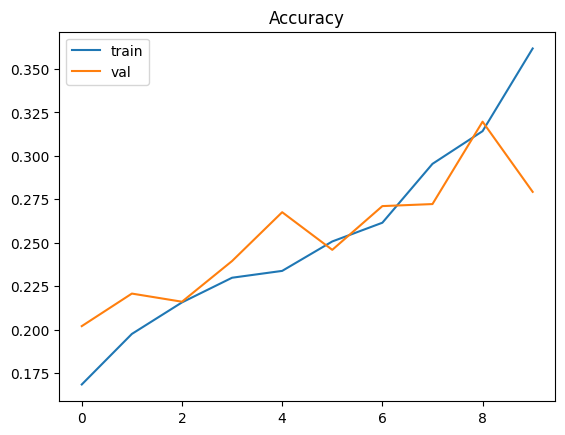

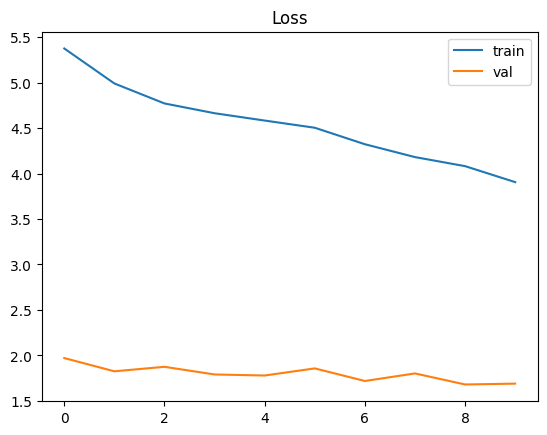

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'val'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'val'])
plt.show()


In [ ]:
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = np.argmax(model.predict(test_ds), axis=1)


54/54 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step


In [ ]:
print(classification_report(y_true, y_pred, target_names=class_names))


              precision    recall  f1-score   support

          1b       0.17      0.39      0.24       100
          1f       0.20      0.75      0.31       130
          2b       0.10      0.85      0.17       100
          2f       0.63      0.05      0.08       265
          5b       0.43      0.25      0.32       100
          5f       0.97      0.03      0.06      1023

    accuracy                           0.17      1718
   macro avg       0.42      0.39      0.20      1718
weighted avg       0.73      0.17      0.11      1718



In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print("Test Accuracy:", test_acc)

54/54 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.3289 - loss: 1.6485
Test Accuracy: 0.1688009351491928


# **Wrong Prediction**

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin Results/Model 10 Epochs/best.pt')
results = model.predict(source='/content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin/Test/', imgsz=640, conf=0.25)

correct = 0
incorrect = 0

for r in results:
    if r.boxes.shape[0] == len(open(r.path.replace('.jpg','.txt')).readlines()):
        correct += 1
    else:
        incorrect += 1

print(f"Correctly predicted images: {correct}")
print(f"Incorrectly predicted images: {incorrect}")



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1718 /content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin/Test/images/1b_1042.jpg: 640x640 1 1b, 202.7ms
image 2/1718 /content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin/Test/images/1b_1044.jpg: 640x640 1 1b, 174.4ms
image 3/1718 /content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin/Test/images/1b_1045.jpg: 640x

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin/Test/images/1b_1042.txt'

In [ ]:
import os
from ultralytics import YOLO

# Paths
model_path = '/content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin Results/Model 10 Epochs/best.pt'
images_path = '/content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin/Test/images'       # folder with images
labels_path = '/content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin/Test/labels'       # folder with YOLO txt annotations

# Load model
model = YOLO(model_path)

# Run predictions
results = model.predict(source=images_path, imgsz=640, conf=0.25)

correct = 0
incorrect = 0

for r in results:
    # Get image name without extension
    img_name = os.path.basename(r.path).split('.')[0]

    # Load corresponding ground truth boxes
    label_file = os.path.join(labels_path, img_name + '.txt')
    with open(label_file, 'r') as f:
        gt_boxes = f.readlines()

    # Number of predicted boxes
    pred_boxes = r.boxes.shape[0]

    # Count correct if number of predictions equals ground truth boxes
    if pred_boxes == len(gt_boxes):
        correct += 1
    else:
        incorrect += 1

print(f"Correctly predicted images: {correct}")
print(f"Incorrectly predicted images: {incorrect}")



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1718 /content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin/Test/images/1b_1042.jpg: 640x640 1 1b, 176.4ms
image 2/1718 /content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin/Test/images/1b_1044.jpg: 640x640 1 1b, 161.3ms
image 3/1718 /content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin/Test/images/1b_1045.jpg: 640x

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin/Test/labels/5f_10.txt'

In [ ]:
import os
from ultralytics import YOLO

# Paths
images_path = "/content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin/Test/images"
labels_path = "/content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin/Test/labels"
model_path = "/content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin Results/Model 10 Epochs/best.pt"

# Coin classes
class_names = ['0', '1', '2', '3', '4', '5']

# Initialize counters
correct_per_class = {name: 0 for name in class_names}
incorrect_per_class = {name: 0 for name in class_names}

# Load YOLOv11 model
model = YOLO(model_path)

# Run predictions
results = model.predict(source=images_path, imgsz=640, conf=0.25)

for r in results:
    img_name = os.path.basename(r.path).split('.')[0]

    # Load ground truth classes for this image
    label_file = os.path.join(labels_path, img_name + '.txt')
    if not os.path.exists(label_file):
        print(f"[SKIP] No label file for image: {img_name}. Moving to next image.")
        continue  # Skip missing labels without stopping

    with open(label_file, 'r') as f:
        gt_classes = [line.split()[0] for line in f.readlines()]  # read class IDs as strings

    # Predicted classes
    pred_classes = [class_names[int(cls)] for cls in r.boxes.cls.cpu().numpy().astype(int)]

    # Count correct/incorrect per class
    for cls_name in class_names:
        gt_count = gt_classes.count(cls_name)
        pred_count = pred_classes.count(cls_name)

        if gt_count > 0:
            if pred_count == gt_count:
                correct_per_class[cls_name] += 1
            else:
                incorrect_per_class[cls_name] += 1

    # Print confirmation for each image
    print(f"[CHECKED] Image '{img_name}' processed. Predicted classes: {pred_classes}, Ground truth: {gt_classes}")

# Print final results
print("\nCorrectly predicted images per class:")
for k, v in correct_per_class.items():
    print(f"{k}: {v}")

print("\nIncorrectly predicted images per class:")
for k, v in incorrect_per_class.items():
    print(f"{k}: {v}")



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1718 /content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin/Test/images/1b_1042.jpg: 640x640 1 1b, 165.2ms
image 2/1718 /content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin/Test/images/1b_1044.jpg: 640x640 1 1b, 164.5ms
image 3/1718 /content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin/Test/images/1b_1045.jpg: 640x

In [ ]:
128+253+23+95+73+98+1+12+14
1718-697

1021

# **Real Time Images**

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.6 MB/s eta 0:00:00


In [3]:
import os
from ultralytics import YOLO
model_path = "/content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /BD Coin Results/Model 10 Epochs/best.pt"
model = YOLO(model_path)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.



image 1/1 /content/8.jpeg: 640x288 1 2f, 356.2ms
Speed: 7.7ms preprocess, 356.2ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 288)
Results saved to /content/runs/detect/track
12 labels saved to /content/runs/detect/track/labels


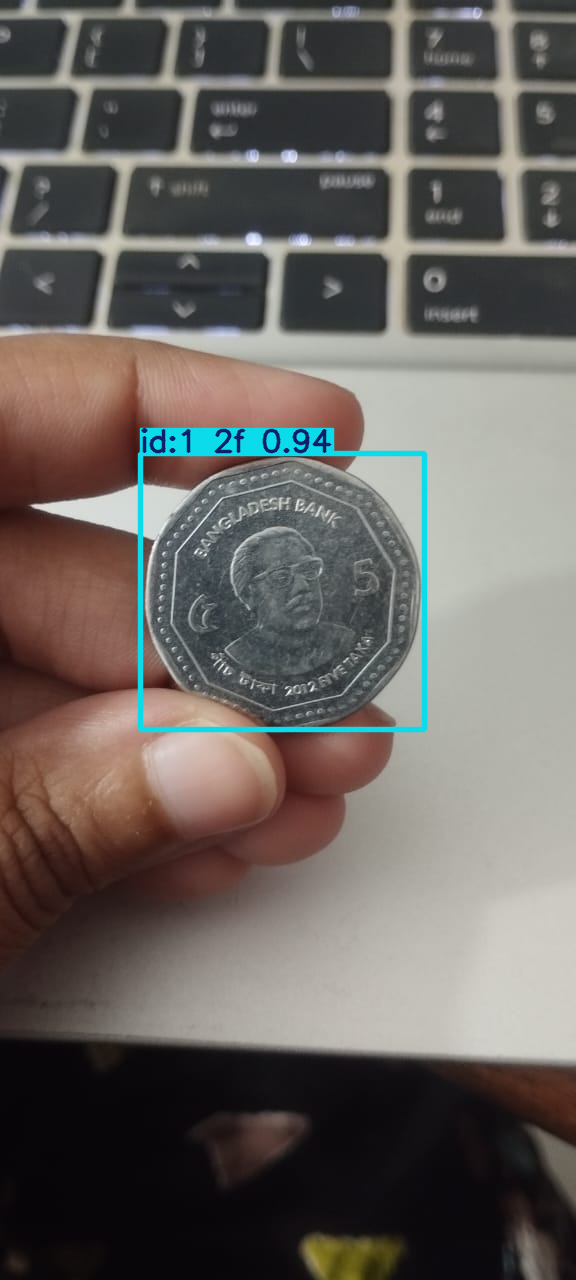

In [17]:
import os


# Print each image path
results = model.track("/content/8.jpeg", save=True, save_txt=True)#, project='/content/drive/MyDrive/KNI Own Materials/Research Materials/Blind People/Vision Research /Datasets/Annotated Currency Dataset/Ouputs/Output with Annotations', name='image')
results[0].show()